<a href="https://colab.research.google.com/github/ViniViniAntunes/QuarentenaDados/blob/master/aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bilbiotecas necessárias
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Baixando o dataset e armazenando em uma variável
url = 'https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv('/content/MICRODADOS_ENEM_2018_SAMPLE_43278.csv')

## Desafio 1
Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [3]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
# Preenchendo com zero
notas_preenchidas_com_0 = dados[colunas_de_notas].fillna(value=0, axis=0)
notas_preenchidas_com_0.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
notas_preenchidas_com_0.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


In [4]:
# Ou preenchendo com a média
media = dados[colunas_de_notas].mean()
notas_preenchidas_com_media = dados[colunas_de_notas].fillna(value=media, axis=0)
notas_preenchidas_com_media.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
notas_preenchidas_com_media.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,493.63,568.31,526.59,535.18,509.13
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,493.63,568.31,526.59,535.18,509.13


In [5]:
# Ou preenchendo com a mediana
mediana = dados[colunas_de_notas].median()
notas_preenchidas_com_mediana = dados[colunas_de_notas].fillna(value=mediana, axis=0)
notas_preenchidas_com_mediana.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
notas_preenchidas_com_mediana.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,483.50,582.40,531.20,516.50,520.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,483.50,582.40,531.20,516.50,520.00


## Desafio 2
A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

### A partir daqui usaremos os dados que foram preenchidos com zero, pois lá na frente precisaremos deles assim

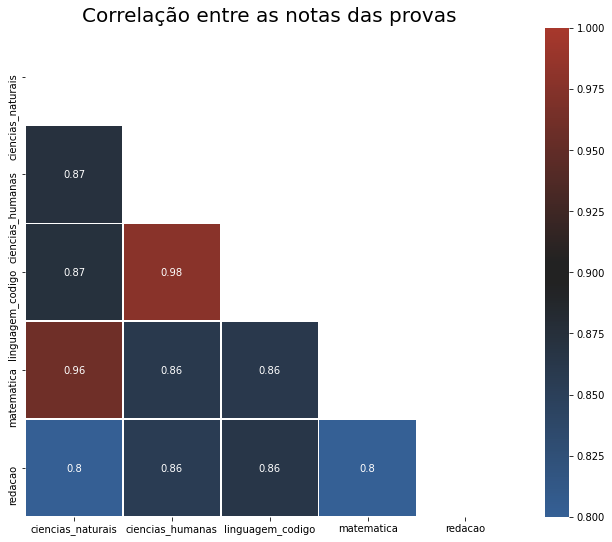

In [6]:
# Escolhendo os dados
notas = notas_preenchidas_com_0

# Configurando o estilo do gráfico
sns.axes_style('whitegrid')

# Calculando as correlações
correlacoes = notas.corr()

# Criando uma matriz triangular superior como máscara
mask = np.zeros_like(correlacoes)
mask[np.triu_indices_from(mask)] = True

# Configurando o tamenho da figura
plt.figure(figsize=(11,9))

# Gerando um mapa de cores divergente personalizado
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=10, center='dark', as_cmap=True)

# Desenhando o heatmap com a matriz de correlação utilizando a máscara criada e a proporções corretas
sns.heatmap(correlacoes, mask=mask, vmax=1, vmin=.8,
            square=True, linewidth=.5, cbar_kws={'shrink': 1}, 
            cmap=cmap, annot=True)

# Configurando o título
plt.title('Correlação entre as notas das provas', fontsize=20)

# Mostrando o gráfico
plt.show()

## Desafio 3
Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [7]:
# Mostrar todas as colunas do DataFrame "dados"
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [8]:
# Selecionando as colunas
colunas_de_respostas_e_gabaritos = [
                                    'TX_GABARITO_CN',
                                    'TX_GABARITO_CH', 
                                    'TX_GABARITO_LC', 
                                    'TX_GABARITO_MT', 
                                    'TX_RESPOSTAS_CN', 
                                    'TX_RESPOSTAS_CH', 
                                    'TX_RESPOSTAS_LC', 
                                    'TX_RESPOSTAS_MT'
                                    ]

# Retirando os valores NaN
dados_respostas_e_gabaritos = dados[colunas_de_respostas_e_gabaritos].dropna()

# Mostrando um pouco como estão os dados
dados_respostas_e_gabaritos.head()

,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC
2,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB
3,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA
6,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC
8,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA


In [9]:
# Criando uma função que some o número de acertos
def calcula_acertos(respostas, gabarito):
  return [sum(c==d for c, d in zip(a,b)) for a, b in zip(respostas, gabarito)]

# Calculando a quantidade de acertos em cada tipo de prova usando a função recém criada
tipos_de_prova = ['CN', 'CH', 'LC', 'MT']
for tipo in tipos_de_prova:
  dados_respostas_e_gabaritos[f'ACERTOS_{tipo}'] = calcula_acertos(dados_respostas_e_gabaritos[f'TX_RESPOSTAS_{tipo}'], 
                                                               dados_respostas_e_gabaritos[f'TX_GABARITO_{tipo}']
                                                               )

# Selecionando a penas as colunas com as quantidades de acertos
acertos = dados_respostas_e_gabaritos.iloc[:, -4:]

# Selecionando a coluna com as notas da redação já eliminando os valores NaN
notas_redacao = dados['NU_NOTA_REDACAO'].dropna()

# Juntando as notas da redação à quantidade de acertos
acertos = acertos.join(notas_redacao, how='outer')

# Mostrando um pouco do DataFrame "acertos"
acertos.head()

,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,NU_NOTA_REDACAO
1,11.00,27.00,33.00,22.00,680.00
2,8.00,9.00,8.00,6.00,600.00
3,7.00,10.00,11.00,10.00,400.00
6,11.00,9.00,15.00,8.00,560.00
8,8.00,12.00,15.00,13.00,660.00


Quantidade de questões corretas e nota da redação e suas correlações entre si


<Figure size 1080x576 with 0 Axes>

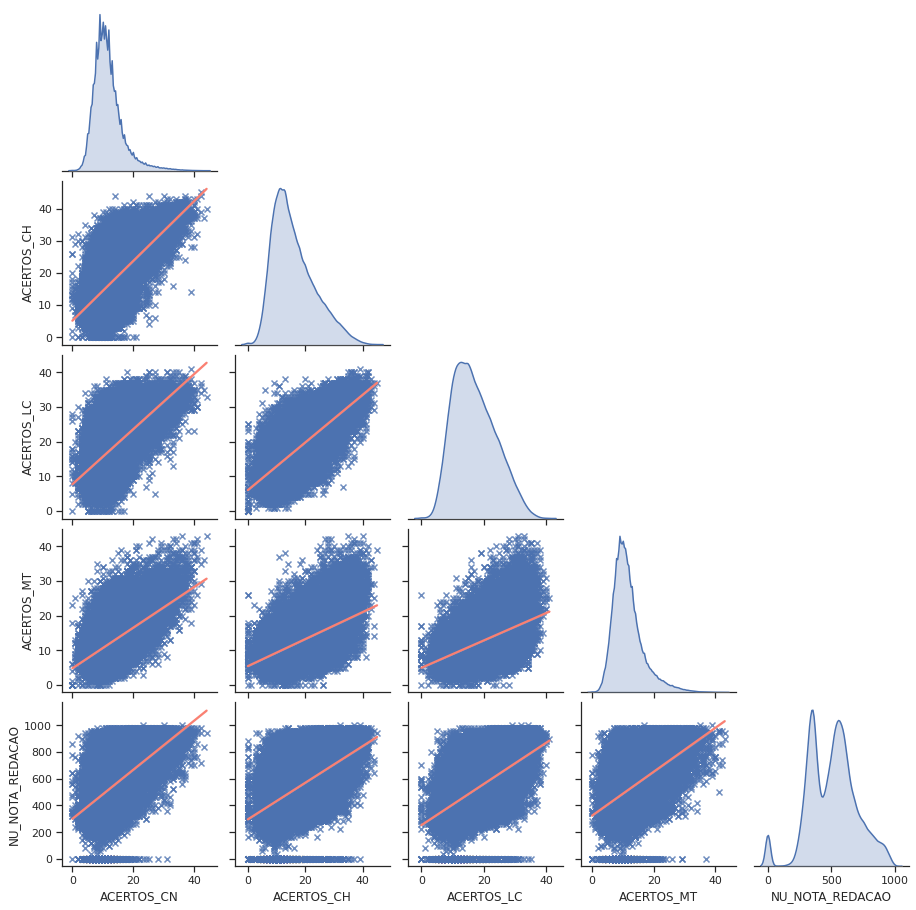

In [10]:
sns.set(style='ticks')

# Configurando o tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando os gráficos de correlação entre as grandezas com a seaborn
ax = sns.pairplot(data=acertos, palette='RdBu', markers='x', 
                  kind='reg', corner=True, diag_kind='kde', 
                  diag_kws=dict(shade=True), plot_kws={'line_kws':{'color':'#FA8072'}}
                 );

# Configurando um título para o gráfico
print('Quantidade de questões corretas e nota da redação e suas correlações entre si')

# Mostrando a figura
plt.show();

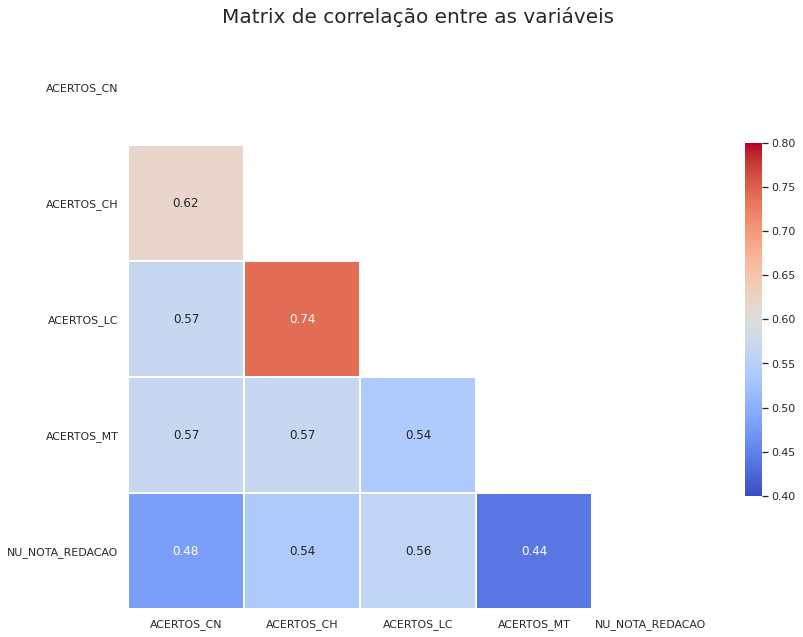

In [11]:
# Configuando o estilo
sns.set(style='whitegrid')

# Criando uma matriz de correlação com os dados do DataFrame "acertos"
correlacao = acertos.corr().round(2)

# Criando uma matriz triangular superior
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True

# Configurando o tamenho da figura
f, ax = plt.subplots(figsize=(13,13))

# Gerando um mapa de cores divergente personalizado
#cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Desenhando o heatmap com a matriz de correlação utilizando a máscara criada
ax = sns.heatmap(correlacao, mask=mask, vmax=0.8, vmin=0.4,
            square=True, linewidth=.9, cbar_kws={'shrink': .5}, 
            cmap='coolwarm', annot=True)

# Configurando o título do gráfico
plt.title('Matrix de correlação entre as variáveis', fontsize=20)

# Rotacionando os labels para deixá-los na horizontal
plt.yticks(rotation=0)
#plt.xticks(rotation=25)

plt.show()

## Desafio 4
Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [12]:
# Nomes das novas colunas de notas
novas_colunas_notas = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

# Fazendo uma cópia dos dados obtidos anteriormente
notas_sem_zero = notas_preenchidas_com_0[novas_colunas_notas].copy()


# Referência:
# https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741
# Retirando as notas zero
notas_sem_zero = notas_sem_zero[~(notas_sem_zero == 0).any(axis=1)]

# Mostrando um pouco do DataFrame "dados_sem_zeros"
notas_sem_zero.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Notas (sem valores NaN e sem zeros) e suas correlações entre si


<Figure size 1080x576 with 0 Axes>

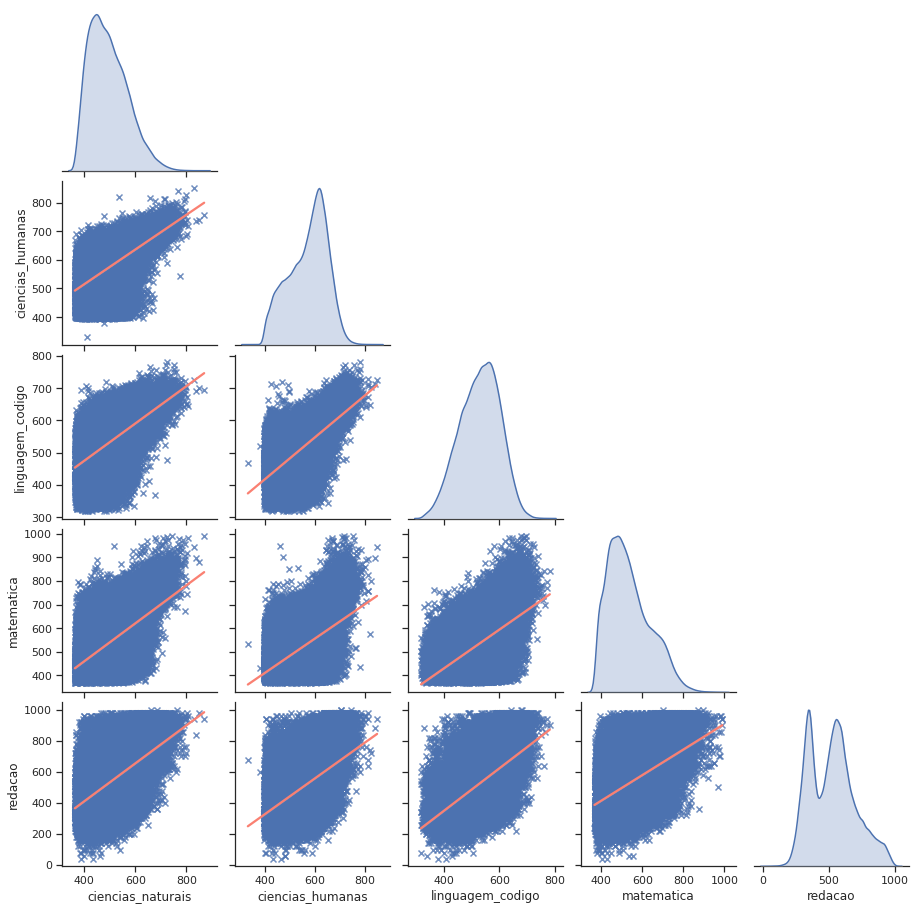

In [13]:
sns.set(style='ticks')

# Configurando o tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando os gráficos de correlação entre as grandezas com a seaborn
ax = sns.pairplot(data=notas_sem_zero, palette='RdBu', markers='x', 
                  kind='reg', diag_kind="kde", corner=True,
                  diag_kws=dict(shade=True), plot_kws={'line_kws':{'color':'#FA8072'}}
                 );

# Configurando um título para o gráfico
print('Notas (sem valores NaN e sem zeros) e suas correlações entre si')

# Mostrando a figura
plt.show();

## Desafio 5
Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

PS: Esse desafio foi realmente muito difícil. E obtive muita ajuda lá no Slack da #QuarentenaDados. A solução apresnetada a seguir, é uma mescla de ideias da galera com algumas inovações minhas (obrigado pessoal!).

In [0]:
# Retirado do dicionário dos dados fornecidos pelo ENEM
# Descrição das cores das provas
desc_cores = {
  'CN': {
    447: 'Azul',
    448: 'Amarela',
    449: 'Cinza',
    450: 'Rosa',
    467: 'Verde - Videoprova - Libras'
  },
  'CH': {
    451: 'Azul',
    452: 'Amarela',
    453: 'Branca',
    454: 'Rosa',
    464: 'Laranja - Adaptada Ledor',
    468: 'Verde - Videoprova - Libras',
    491: 'Azul (Reaplicação)',
    492: 'Amarelo (Reaplicação)',
    493: 'Branco (Reaplicação)',
    494: 'Rosa (Reaplicação)'
  },
  'LC': {
    455: 'Azul',
    456: 'Amarela',
    457: 'Rosa',
    458: 'Branca',
    465: 'Laranja - Adaptada Ledor',
    469: 'Verde - Videoprova - Libras',
    495: 'Azul (Reaplicação)',
    496: 'Amarelo (Reaplicação)',
    497: 'Branca (Reaplicação)',
    498: 'Rosa (Reaplicação)'
  },
  'MT': {
    459: 'Azul',
    460: 'Amarela',
    461: 'Rosa',
    462: 'Cinza',
    466: 'Laranja - Adaptada Ledor',
    470: 'Verde - Videoprova - Libras'
  }
}

# Descricão das provas
desc_tipos = {
    'CN': 'Ciências da Natureza',
    'CH': 'Ciências Humanas',
    'LC': 'Linguagens e Códigos',
    'MT': 'Matemática'
}

In [0]:
# Definindo uma função para plotar o gráfico de número de acertos por questão dados o código da matéria e o código da cor da prova
def plota_acertos_por_questao(cod_materia, cod_cor_prova):
  
  # Definindo uma função para corrigir as questões
  def corrige_questoes(aluno, materia):
      respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
      gabarito = aluno.get(f'TX_GABARITO_{materia}')
      return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])


  # Analisando a prova escolhida
  prova = dados.query(f'CO_PROVA_{cod_materia} == {cod_cor_prova}')
  matriz_acertos = prova.apply(corrige_questoes, materia=f'{cod_materia}', axis=1)

  # Somando o todal de acertos e armazenando em um DataFrame
  total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
  total_acertos_por_questao.reset_index(inplace=True)
  total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
  total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

  # Configurando o estilo
  sns.set_style('whitegrid')

  # Configuando o tamanho da figura
  plt.figure(figsize=(20, 10))

  # Configuando o  gráfico
  ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao, 
                   palette=sns.color_palette('husl', n_colors=matriz_acertos.shape[1] + 10)
                   )
  
  # Configuando o título de forma dinâmica
  cor_prova = desc_cores[cod_materia][cod_cor_prova]
  materia_prova = desc_tipos[cod_materia]
  titulo = f'Número de acertos por questão da prova {cor_prova} de {materia_prova}'
  ax.set_title(titulo, fontsize=20)

  # Plotando o gráfico
  plt.show()

  # Retornando um print somente para dar um espaço ao final
  return print('\n')

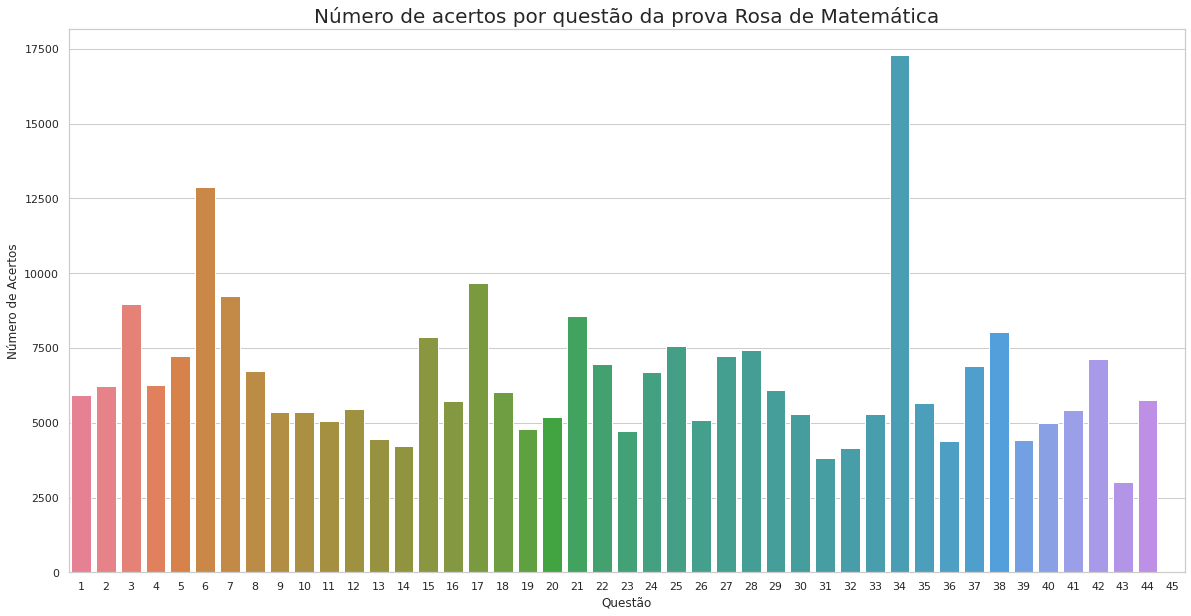

In [16]:
# Chamando a função "plota_acertos_por_questao()" para a prova de Matemática ('MT') prova da cor rosa (cód. 461)
plota_acertos_por_questao('MT', 461)

## 

In [0]:
# Com ajuda do Slack do DataHackers
# Definindo a função "processa_linha"
def processa_linha(linha, tipo):
    
    # Selecionando as respostas
    resp = linha[f'TX_RESPOSTAS_{tipo}']
    
    # Selecionando o gabarito
    gab = linha[f'TX_GABARITO_{tipo}']
    
    # Criando uma variável do tipo dict para armazenar as respostas
    res = dict()
    
    # Laço para desconsiderar respoastas em branco
    for i in range(len(resp)):
        if resp[i] == 9:
            continue
        
        # Checando por erros
        res[i+1] = (resp[i] != gab[i]) * 1
    
    # Retornando uma Series com as respostas
    return pd.Series(res)

In [18]:
# Selecionando as colunas
colunas_necessarias = [
                        'TX_GABARITO_CN',
                        'TX_GABARITO_CH', 
                        'TX_GABARITO_LC', 
                        'TX_GABARITO_MT', 
                        'TX_RESPOSTAS_CN', 
                        'TX_RESPOSTAS_CH', 
                        'TX_RESPOSTAS_LC', 
                        'TX_RESPOSTAS_MT', 
                        'CO_PROVA_CN', 
                        'CO_PROVA_CH', 
                        'CO_PROVA_LC', 
                        'CO_PROVA_MT'
                        ]

# Retirando os valores NaN
dados_sem_zeros = dados[colunas_necessarias].dropna().fillna(value=0, axis=0)

# Retirando as notas zero
dados_sem_zeros = dados_sem_zeros[~(dados_sem_zeros == 0).any(axis=1)]

# Mostrando um pouco do DataFrame "dados_sem_zeros"
dados_sem_zeros.head()

,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT
1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,448.00,454.00,457.00,460.00
2,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,447.00,451.00,455.00,459.00
3,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,450.00,453.00,458.00,461.00
6,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,450.00,453.00,458.00,461.00
8,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,449.00,454.00,457.00,462.00


In [19]:
# Criando algumas variáveis necessárias
maior_indice = -1
maior_valor = -1
maior_cor = 'Nenhum'
maior_tipo = 'CH'

# Laço que percorre todos as provas
for tipo in ['CN', 'CH', 'MT', 'LC']:

  cod_cores = dados_sem_zeros[f'CO_PROVA_{tipo}'].unique()
  
  # Questões de 1 a 45
  colunas_eixo_x = [str(i) for i in range(1, 46)]

  # Laço que percorre todas as cores
  for cor in cod_cores:
    
    # A plicando a função "processa_linha()" em todas as provas para calcular a quantidade de acertos por questão
    tmp = dados_sem_zeros.query(f'CO_PROVA_{tipo} == {cor}')[[
                                                            f'TX_RESPOSTAS_{tipo}', 
                                                            f'TX_GABARITO_{tipo}'
                                                            ]].apply(processa_linha, 
                                                                     args=[tipo], 
                                                                     axis=1).sum()
    
    idxmax = tmp.idxmax()

    # Configurando informações da questão com maior número de erros
    if maior_valor < tmp[idxmax]:
      maior_indice = idxmax
      maior_valor = tmp[idxmax]
      maior_cor = cor
      maior_tipo = tipo

# Mostrando resultados
print('Questão com mais erros foi... ')
print(f'Prova  : {desc_tipos[maior_tipo]} ({maior_tipo}) - {desc_cores[maior_tipo][int(maior_cor)]} (cód. {maior_cor})')
print(f'Questão: {maior_indice}')
print(f'Erros  : {maior_valor}')

Questão com mais erros foi... 
Prova  : Matemática (MT) - Azul (cód. 459.0)
Questão: 28
Erros  : 24384
